#SUBSYTEM INTRO PROJECT

In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###Load the IRIS dataset

In [2]:
#Load IRIS dataset from sklearn

import pandas as pd
from sklearn import datasets
from google.colab import files

iris = datasets.load_iris()

# Create a pandas DataFrame with the data and column names
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Add the target column (species)
df['species'] = iris['target']

# Save the DataFrame to a CSV file
df.to_csv('iris_data.csv', index=False)

In [3]:
df = pd.read_csv('iris_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


###Now, to make sure you can use the data, explore the dataframe:


In [4]:
# use the .shape() method to get the organizational structure of the dataframe

rows, coloumns = df.shape
print("Rows: ",rows)
print("Coloumns: ",coloumns)

Rows:  150
Coloumns:  5


In [5]:
# use the .head() method to display within your notebook the first 20 lines in the dataframe

df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
#use the .describe() method to generate some important univariate statistics for each of the features (columns) in your dataframe

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
#use the .grouby() and .size() methods to determine how many samples (rows) there are for each of the 3 species of iris.

df.groupby('species').size()

,0
species,
0,50
1,50
2,50


###Feature data visualization

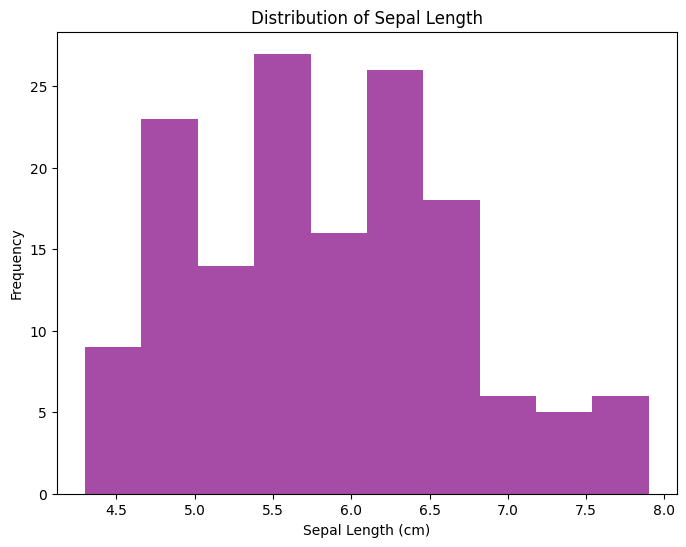

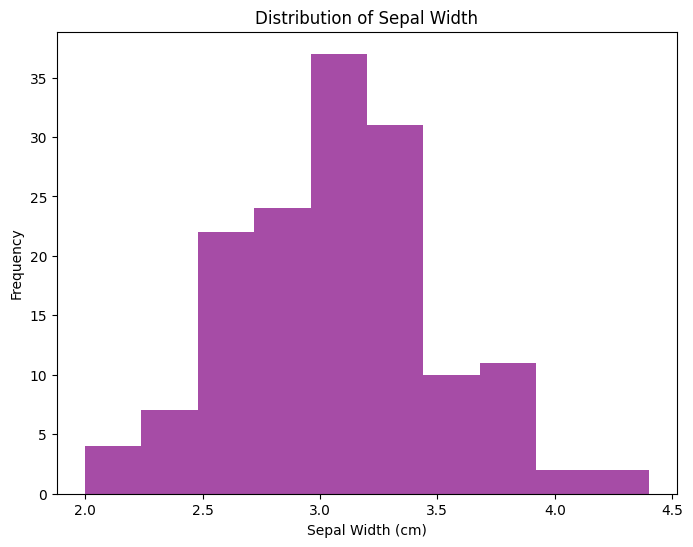

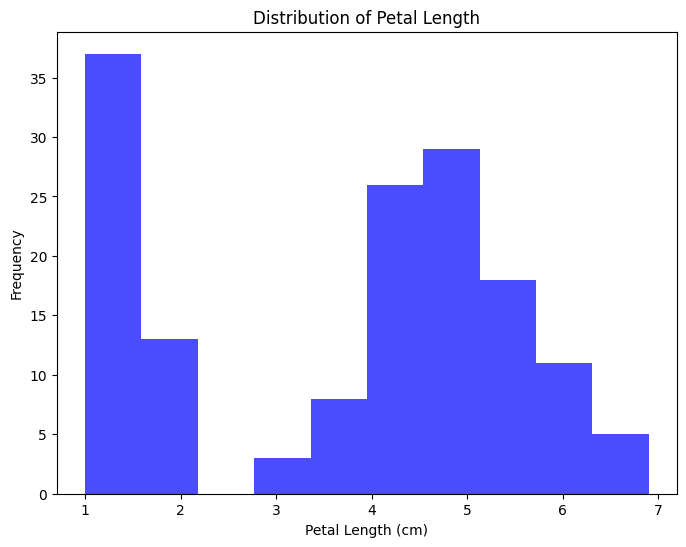

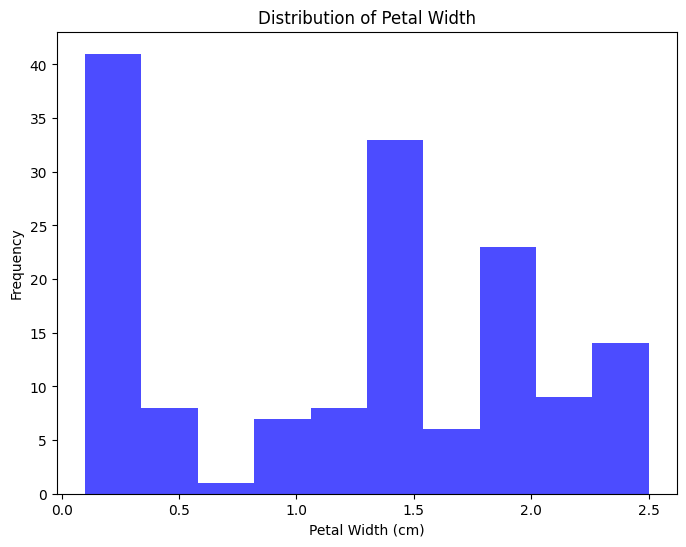

In [8]:
#Create histograms with 10 bins per histogram for the 4 independent variables make sure that your histograms have titles and axis labels.

# sepal-length
plt.figure(figsize=(8,6))
plt.hist(df['sepal length (cm)'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# sepal-width
plt.figure(figsize=(8,6))
plt.hist(df['sepal width (cm)'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# petal-length
plt.figure(figsize=(8,6))
plt.hist(df['petal length (cm)'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


# petal-width
plt.figure(figsize=(8,6))
plt.hist(df['petal width (cm)'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()


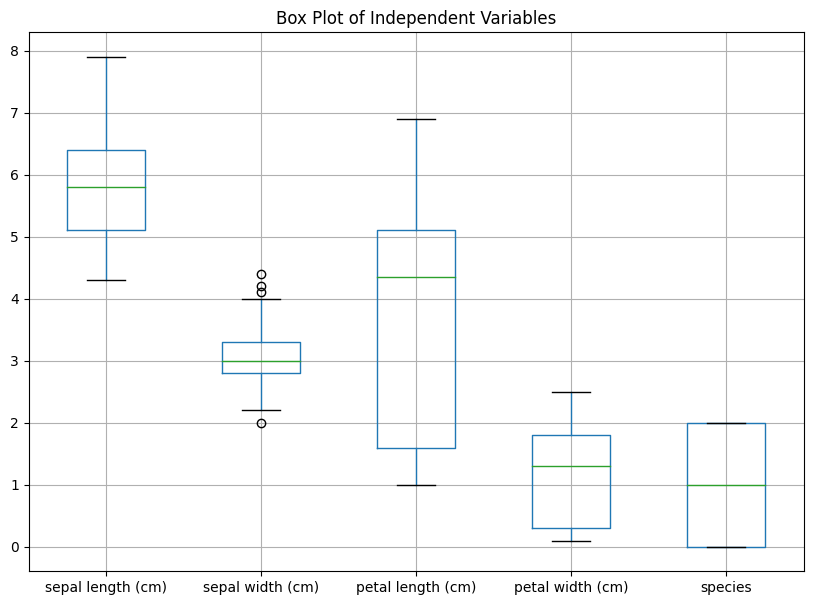

In [9]:
# Now, use the matplotlib.pylot() method to create box plots for the independent variables in the dataset.

# box plot for independent variables
plt.figure(figsize=(10,7))
df.boxplot()
plt.title('Box Plot of Independent Variables')
plt.show()


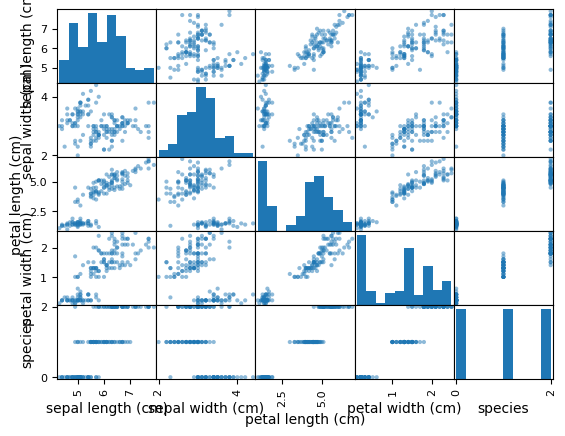

In [10]:
# Now you need to visualize the relationship between the variables (you will do pairwise comparisons of variables – ‘bivariate’ analysis).

# Scatter_matrix
scatter_matrix(df)
plt.show()

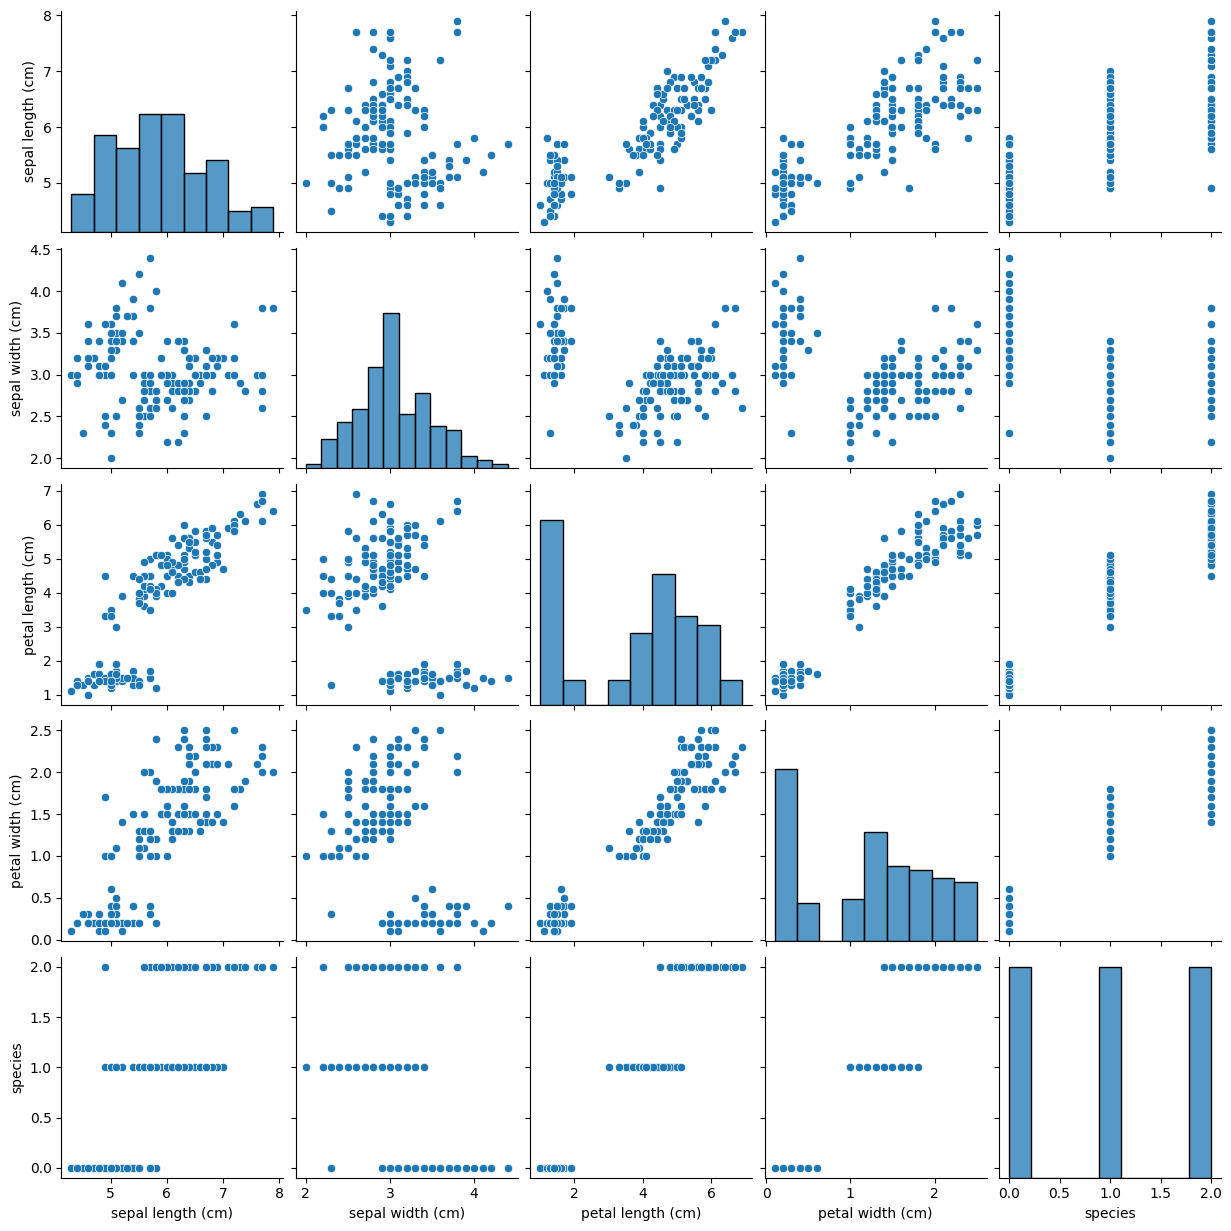

In [11]:
#Seaborn plot
import seaborn as sns

# Generate a pair plot using seaborn
sns.pairplot(df)

# Show the plot
plt.show()

###Training models

In [12]:
# First, we need to split out data into a subset used for training our models and a subset use for validating (comparing) our models.
# independant variables
X=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# the dependent variable
y = df[['species']]

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
#Load library for the four models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [14]:
# Create a decision tree classifier

# Define the parameter grid
param_grid = {'max_depth': [2, 3, 5, 7, 10]}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 7}

In [15]:
#Train model with best params
clf = DecisionTreeClassifier(max_depth = 10)

# Train the model on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_valid)

print('Decision Tree Classifier accuracy score')
print(accuracy_score(y_valid, y_pred))

Decision Tree Classifier accuracy score
0.9666666666666667


In [16]:
print('Decision Tree Classifier confusion matrix')
print(confusion_matrix(y_valid, y_pred))

Decision Tree Classifier confusion matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [17]:
print('Decision Tree Classifier classification report')
print(classification_report(y_valid, y_pred))

Decision Tree Classifier classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [18]:
# Support-vector clasifier [SVC]

# linear search 'C' in [0.01, 1] with 1000 values
param_grid= {'C' : [0.001, 1, 1000]}

svc_model = SVC(kernel='linear')
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

grid_search.best_params_

{'C': 1}

In [19]:
#Train model with best params

svc_model = SVC(kernel='linear', C=1.0, gamma='auto')

svc_model.fit(x_train, y_train.values.ravel())

y_pred = svc_model.predict(x_valid)

print('SVC accuracy score')
print(accuracy_score(y_valid, y_pred))

SVC accuracy score
1.0


In [20]:
print('SVC confusion matrix')
print(confusion_matrix(y_valid, y_pred))

SVC confusion matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [21]:
print('SVC classification report')
print(classification_report(y_valid, y_pred))

SVC classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
# naïve Bayes classifier [GaussianNB]

# Define the parameter grid for grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Step 5: Perform grid search with cross-validation to find the best var_smoothing
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Step 6: Get the best var_smoothing value and the best estimator
grid_search.best_params_


{'var_smoothing': 1e-09}

In [23]:
# Train model with the best params
gnb = GaussianNB(var_smoothing=1e-09)
gnb.fit(x_train,y_train.values.ravel())
y_pred = gnb.predict(x_valid)

print('gnb accuracy score')
print(accuracy_score(y_valid, y_pred))

gnb accuracy score
0.9666666666666667


In [24]:
print('gnb confusion matrix')
print(confusion_matrix(y_valid, y_pred))

gnb confusion matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [25]:
print('gnb classification report')
print(classification_report(y_valid, y_pred))

gnb classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
#  k-nearest neighbor classifier [KNeighborsClassifier]
knn = KNeighborsClassifier()

# Step 4: Define the hyperparameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11] }

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Step 6: Get the best parameters and the best estimator
grid_search.best_params_

{'n_neighbors': 11}

In [27]:
#Train the model with the best params
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train.values.ravel())

y_pred = knn.predict(x_valid)

print('knn accuracy score')
print(accuracy_score(y_valid, y_pred))

knn accuracy score
0.9666666666666667


In [28]:
print('knn confusion matrix')
print(confusion_matrix(y_valid, y_pred))

knn confusion matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [29]:
print('knn classification report')
print(classification_report(y_valid, y_pred))

knn classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



###Summary

After finding the best parameters using a gridsearch, I trained a decision tree classifier, a support-vector classifier, a naïve Bayes classifier, and a  k-nearest neighbor classifier.

The model I would use to predict which iris species in the A&M AgriLife greenhouses, is the support-vector classifier [SVC]. This model had the highest accuracy score, and had according to the confusion matrices the highest amount of correctly predict iris species, based on the 4 indpendent features: petal length, petal width, sepal length, and sepal width.  